# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

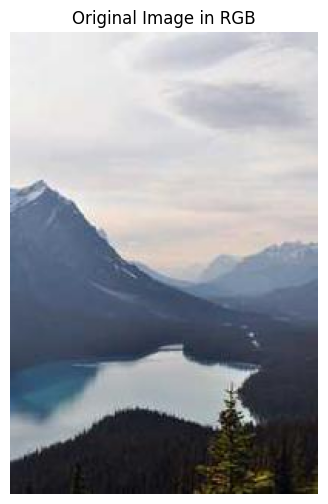

In [1]:
# Importing image from Piscum Photos using get URL and Displaying it.
from PIL import Image
import requests
import io
from io import BytesIO
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

url = "https://picsum.photos/200/300"

response = requests.get(url)

image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
img_bgr = cv.imdecode(image_array, cv.IMREAD_COLOR)

img_rgb=cv.cvtColor(img_bgr,cv.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Image in RGB")
plt.show()



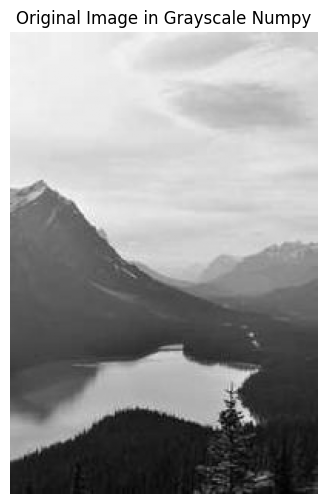

In [2]:
# Converting the image to GrayScale by splitting the Img_rgb into R,G and B channels.
R = img_rgb[:, :, 0].astype(np.float32)
G = img_rgb[:, :, 1].astype(np.float32)
B = img_rgb[:, :, 2].astype(np.float32)
gray_numpy = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)
plt.figure(figsize=(6,6))
plt.imshow(gray_numpy,cmap="gray")
plt.axis("off")
plt.title("Original Image in Grayscale Numpy")
plt.show()

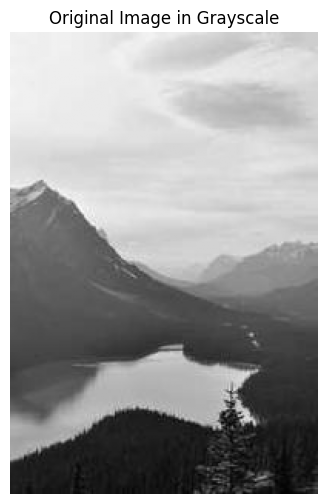

In [3]:
# Using OpenCV library to convert rgb image into GrayScale.
gray=cv.cvtColor(img_bgr,cv.COLOR_BGR2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(gray,cmap="gray")
plt.axis("off")
plt.title("Original Image in Grayscale")
plt.show()

In [4]:
# printing the shape of RGB and Grayscale arrays.
print("Shape of RGB Image:",img_rgb.shape)
print("Shape of Grayscale Image:",gray.shape)
# Shape of rgb image is in 3 dimensions because it consists of 3 different matrices representing each colour channel namely r,g and b.
# While in grayscale we combine the r,g,b channels in a fixed ratio to form only one single [r,c] matrix. Hence the shape of Grayscale image is justified.

Shape of RGB Image: (300, 200, 3)
Shape of Grayscale Image: (300, 200)


In [5]:
print("RGB pixel value at (10, 15):", img_rgb[10,15])
print("Grayscale pixel value at (10, 15):", gray[10,15])

print("RGB pixel value at (15, 45):", img_rgb[15,45])
print("Grayscale pixel value at (15, 45):", gray[15,45])

print("RGB pixel value at (112, 115):", img_rgb[120,150])
print("Grayscale pixel value at (112, 115):", gray[120,150])

RGB pixel value at (10, 15): [236 235 240]
Grayscale pixel value at (10, 15): 236
RGB pixel value at (15, 45): [236 236 236]
Grayscale pixel value at (15, 45): 236
RGB pixel value at (112, 115): [220 209 205]
Grayscale pixel value at (112, 115): 212


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [7]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

gray_float=gray.astype(np.float32) # Converts image from 0-255 integers to decimals(float32)
f=np.fft.fft2(gray_float) # Applies 2D fast fourier transform to convert to frequency domain
f_shift=np.fft.fftshift(f) # Shifts low frequency values to the center

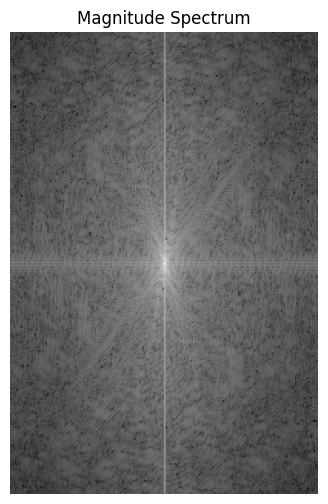

In [8]:
# Plotting the magnitude spectrum of the image using the formula
magnitude =20 *np.log( np.abs(f_shift)+1)
plt.figure(figsize=(6,6))
plt.imshow(magnitude,cmap="gray")
plt.axis("off")
plt.title("Magnitude Spectrum")
plt.show()


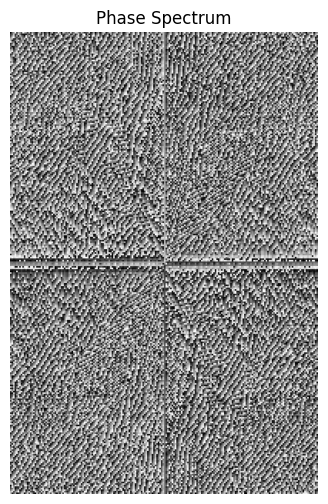

In [10]:
# Plotting the phase spectrum of the iimage.
phase=np.angle(f_shift)
plt.figure(figsize=(6,6))
plt.imshow(phase,cmap="gray")
plt.axis("off")
plt.title("Phase Spectrum")
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

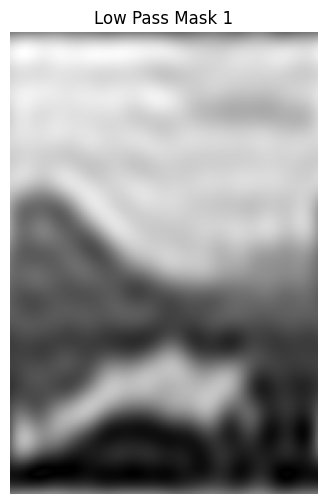

In [11]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

# Low Pass Mask 1
rows, cols = gray.shape
crow, ccol = rows//2,cols//2

radius=10

mask_lpf=np.zeros((rows,cols),np.uint8)
cv.circle(mask_lpf,(ccol,crow),radius,1,-1)

f_lpf=f_shift*mask_lpf

ishift_lpf=np.fft.ifftshift(f_lpf)
img_back_lpf=np.fft.ifft2(ishift_lpf)
iimg_lpf=np.abs(img_back_lpf)

plt.figure(figsize=(6,6))
plt.imshow(iimg_lpf,cmap="gray")
plt.axis("off")
plt.title("Low Pass Mask 1")
plt.show()

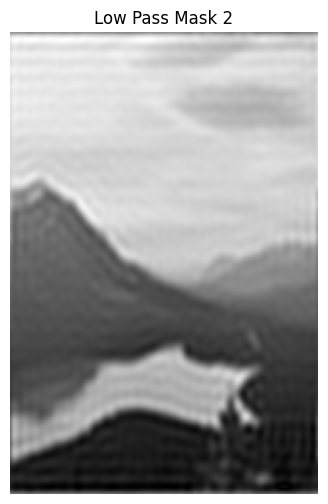

In [12]:
# Low Pass Mask 2
rows, cols = gray.shape
crow, ccol = rows//2,cols//2

radius=30

mask_lpf=np.zeros((rows,cols),np.uint8)
cv.circle(mask_lpf,(ccol,crow),radius,1,-1)

f_lpf=f_shift*mask_lpf

ishift_lpf=np.fft.ifftshift(f_lpf)
img_back_lpf=np.fft.ifft2(ishift_lpf)
iimg_lpf=np.abs(img_back_lpf)

plt.figure(figsize=(6,6))
plt.imshow(iimg_lpf,cmap="gray")
plt.axis("off")
plt.title("Low Pass Mask 2")
plt.show()

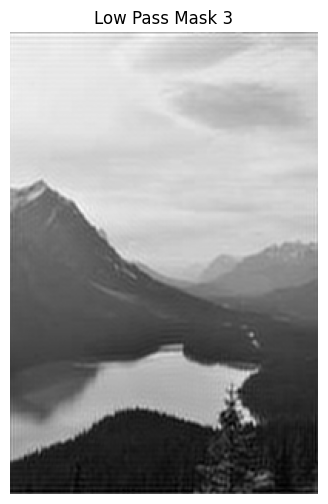

In [13]:
# Low Pass Mask 3
rows, cols = gray.shape
crow, ccol = rows//2,cols//2

radius=80

mask_lpf=np.zeros((rows,cols),np.uint8)
cv.circle(mask_lpf,(ccol,crow),radius,1,-1)

f_lpf=f_shift*mask_lpf

ishift_lpf=np.fft.ifftshift(f_lpf)
img_back_lpf=np.fft.ifft2(ishift_lpf)
iimg_lpf=np.abs(img_back_lpf)

plt.figure(figsize=(6,6))
plt.imshow(iimg_lpf,cmap="gray")
plt.axis("off")
plt.title("Low Pass Mask 3")
plt.show()

In [ ]:
# From above we can see that as radius increases the blur level decreases.
# This is because we shifted the low frequency components to the center.
# As we increase the radius more and more high frequency terms are filtered and hence the image gets more and more sharpened.

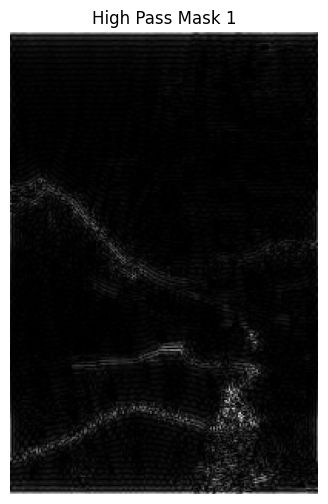

In [16]:
# High Pass Mask 1
rows, cols = gray.shape
crow, ccol = rows//2,cols//2

radius=40

mask_lpf=np.zeros((rows,cols),np.uint8)
cv.circle(mask_lpf,(ccol,crow),radius,1,-1)

f_lpf=f_shift*mask_lpf
f_hpf=f_shift-f_lpf

ishift_hpf=np.fft.ifftshift(f_hpf)
img_back_hpf=np.fft.ifft2(ishift_hpf)
iimg_hpf=np.abs(img_back_hpf)

plt.figure(figsize=(6,6))
plt.imshow(iimg_hpf,cmap="gray")
plt.axis("off")
plt.title("High Pass Mask 1")
plt.show()

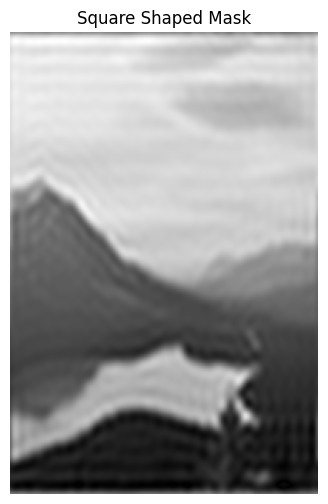

In [17]:
# square Shaped Mask
rows, cols = gray.shape
crow, ccol = rows//2,cols//2

square_size=50
half_size=square_size//2
mask_lpf=np.zeros((rows,cols),np.uint8)
mask_lpf[crow-half_size:crow+half_size,ccol-half_size:ccol+half_size]=1

f_lpf=f_shift*mask_lpf

ishift_lpf=np.fft.ifftshift(f_lpf)
img_back_lpf=np.fft.ifft2(ishift_lpf)
iimg_lpf=np.abs(img_back_lpf)

plt.figure(figsize=(6,6))
plt.imshow(iimg_lpf,cmap="gray")
plt.axis("off")
plt.title("Square Shaped Mask")
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

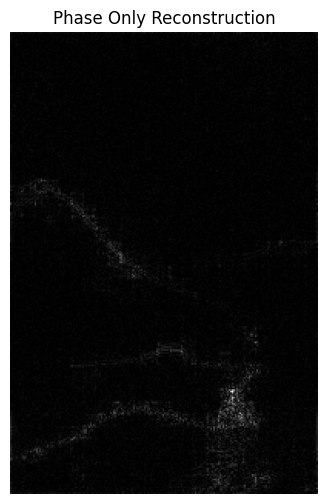

In [18]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

# Using Phase Only Method
phase_only=f_shift/np.abs(f_shift)
ishift_phase=np.fft.ifftshift(phase_only)
img_back_phase=np.fft.ifft2(ishift_phase)
iimg_phase=np.abs(img_back_phase)

plt.figure(figsize=(6,6))
plt.imshow(iimg_phase,cmap="gray")
plt.axis("off")
plt.title("Phase Only Reconstruction")
plt.show()




In [19]:
# The phase only method divides each FFT by its magnitude.
# This results in unit magnitude complex numbers and hence the phase information is still preserved while the magnitude information is completely lost.
# np.angle returns real numbers in the form if phase only while fshift/abs(fshift) returns complex numbers.
# hence we can directly use the complex number obtained by phase only method into IFFT. While np.angle method requires an extra step to convert the real number into a commplex number


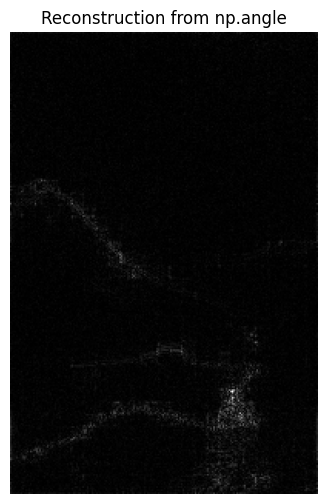

In [20]:
# Reconstruction from np.angle
phase=np.angle(f_shift)
ishift_phase=np.exp(1j*phase)  #This is the extra step in this method
img_back_phase=np.fft.ifft2(ishift_phase)
iimg_phase=np.abs(img_back_phase)
plt.figure(figsize=(6,6))
plt.imshow(iimg_phase,cmap="gray")
plt.axis("off")
plt.title("Reconstruction from np.angle")
plt.show()



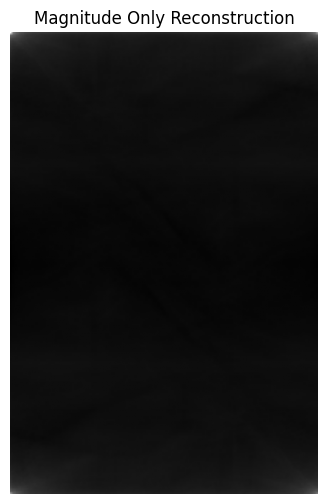

In [21]:
# Magnitude only reconstruction
mag_only=np.abs(f_shift)
ishift_mag=np.fft.ifftshift(mag_only)
img_back_mag=np.fft.ifft2(ishift_mag)
iimg_mag=np.abs(img_back_mag)
plt.figure(figsize=(6,6))
plt.imshow(iimg_mag,cmap="gray")
plt.axis("off")
plt.title("Magnitude Only Reconstruction")
plt.show()

# Since this assumes constant phase of 0 for all frequencies and hence it gives unrecognizable noise.

In [22]:
# Formula: magnitude_spectrum=20*log(|fshift|+1)
# This brings the raw magnitude range into smaller numbers so that all the frequencies are visible.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

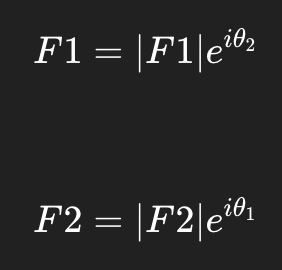

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


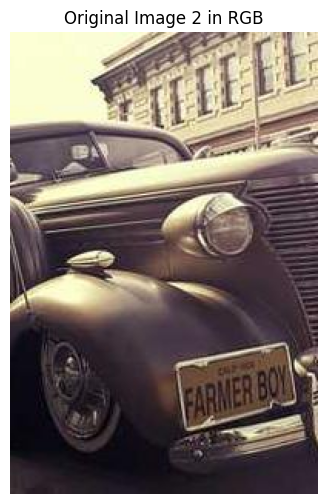

In [23]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

url = "https://picsum.photos/200/300"

response = requests.get(url)

image_array2 = np.asarray(bytearray(response.content), dtype=np.uint8)
img_bgr2 = cv.imdecode(image_array2, cv.IMREAD_COLOR)

img_rgb2=cv.cvtColor(img_bgr2,cv.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_rgb2)
plt.axis("off")
plt.title("Original Image 2 in RGB")
plt.show()



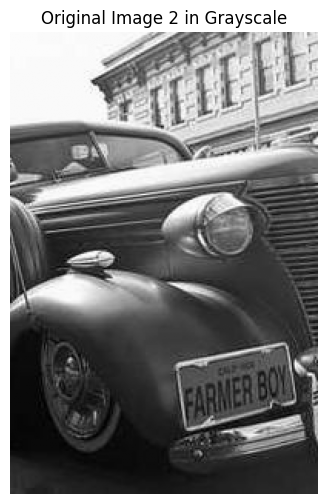

In [24]:
gray2=cv.cvtColor(img_bgr2,cv.COLOR_BGR2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(gray2,cmap="gray")
plt.axis("off")
plt.title("Original Image 2 in Grayscale")
plt.show()

In [25]:
gray_float2=gray2.astype(np.float32)
f2=np.fft.fft2(gray_float2)
f_shift2=np.fft.fftshift(f2)

In [26]:
magnitude2 =20 *np.log( np.abs(f_shift2)+1)
phase2=np.angle(f_shift2)

In [27]:
f_mag1=magnitude * np.exp(1j*phase)
f_mag2=magnitude2 * np.exp(1j*phase2)
f_mag1_phase2_shift=magnitude * np.exp(1j*phase2)
f_mag2_phase1_shift=magnitude2 * np.exp(1j*phase)

In [28]:
# Exchanging the magnitude and phase between the images
f_img_mag1=np.fft.fftshift(f_mag1)
img_mag1=np.fft.ifft2(f_img_mag1)
img_mag1=np.real(img_mag1)

f_img_mag2=np.fft.fftshift(f_mag2)
img_mag2=np.fft.ifft2(f_img_mag2)
img_mag2=np.real(img_mag2)

f_img_mag1_phase2=np.fft.fftshift(f_mag1_phase2_shift)
img_mag1_phase2=np.fft.ifft2(f_img_mag1_phase2)
img_mag1_phase2=np.real(img_mag1_phase2)

f_img_mag2_phase1=np.fft.fftshift(f_mag2_phase1_shift)
img_mag2_phase1=np.fft.ifft2(f_img_mag2_phase1)
img_mag2_phase1=np.real(img_mag2_phase1)

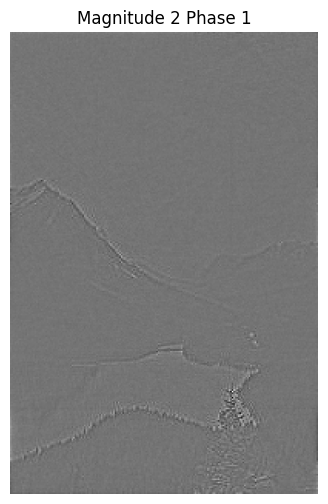

In [29]:
plt.figure(figsize=(6,6))
plt.imshow(img_mag2_phase1,cmap="gray")
plt.axis("off")
plt.title("Magnitude 2 Phase 1")
plt.show()

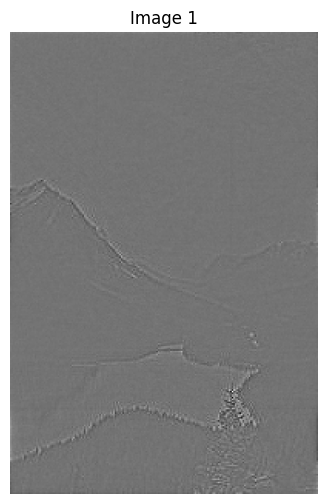

In [30]:
plt.figure(figsize=(6,6))
plt.imshow(img_mag1,cmap="gray")
plt.axis("off")
plt.title("Image 1")
plt.show()

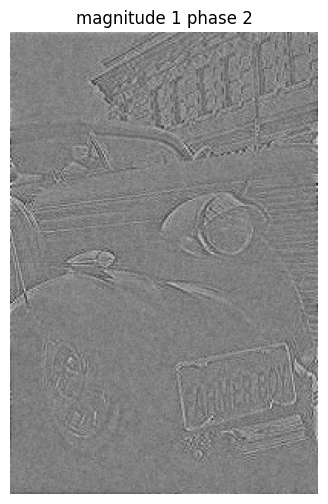

In [31]:
plt.figure(figsize=(6,6))
plt.imshow(img_mag1_phase2,cmap="gray")
plt.axis("off")
plt.title("magnitude 1 phase 2")
plt.show()

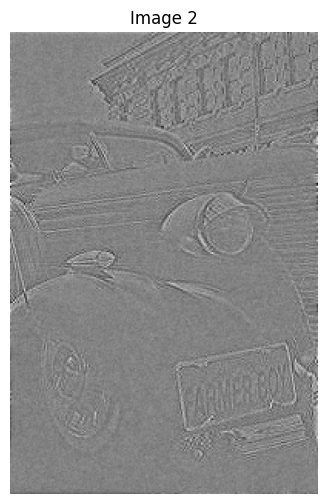

In [32]:
plt.figure(figsize=(6,6))
plt.imshow(img_mag2,cmap="gray")
plt.axis("off")
plt.title("Image 2")
plt.show()